In [1]:
import numpy as np

def target_density(x):
    y = (2 + np.sin(3 * x) + np.cos(5 * x)) * np.exp(- x**2 / 2)
    return y

In [2]:
def Metropolis_Hastings_sampler(num_sample=1000, init_value=0, burn_in=0.9):

    iteration_num = int(num_sample * (1 / (1-burn_in)))
    burn_in_num = int(iteration_num * burn_in)
    current = np.zeros(num_sample)
    dim = len(current)
    samples = []

    # 버닝인 단계
    for _ in range(burn_in_num):
        proposal = current + np.random.normal(0, 2.0, size=dim)
        accept_probability = np.minimum(1, target_density(proposal) / target_density(current))
        accepted = np.random.rand(dim) < accept_probability
        current[accepted] = proposal[accepted]

    # 샘플링 단계
    proposal = current + np.random.normal(0, 2.0, size=dim)
    accept_probability = np.minimum(1, target_density(proposal) / target_density(current))
    accepted = np.random.rand(dim) < accept_probability
    current[accepted] = proposal[accepted]
    samples = current

    return samples

In [3]:
num_sample = 1000
samples = Metropolis_Hastings_sampler(num_sample, burn_in=0.9)
print(len(samples))

1000


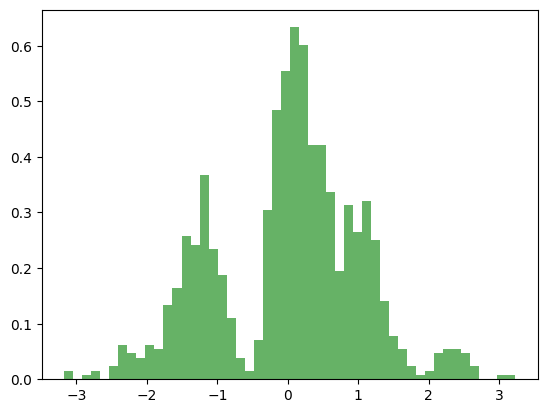

In [4]:
from matplotlib import pyplot as plt
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g')
plt.show()

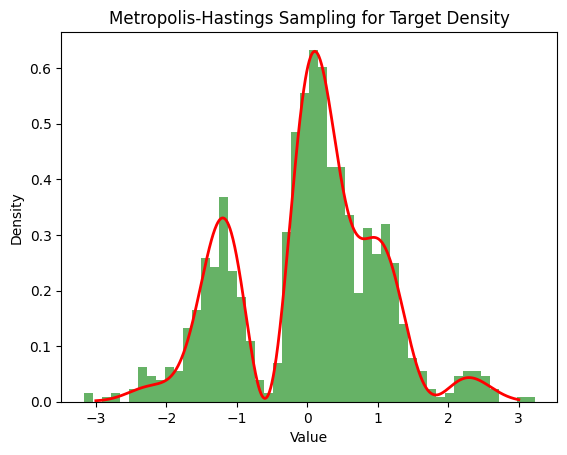

In [5]:
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g')
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, [target_density(x)/5.01 for x in xs], 'r-', lw=2)
plt.title('Metropolis-Hastings Sampling for Target Density')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()